In [56]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [57]:
bank = pd.read_csv("bank-full - bank-full.csv")

In [58]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [59]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [60]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [61]:
bank.shape

(45211, 17)

In [62]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [63]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le=LabelEncoder()

In [66]:
bank['y']=le.fit_transform(bank['y'])

In [67]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [68]:
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [69]:
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [70]:
print('0 is in dataset :' ,39922/45211*100)

0 is in dataset : 88.30151954170445


In [71]:
print('1 is in dataset :' ,5289/45211*100)

1 is in dataset : 11.698480458295547


In [72]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [73]:
bank.shape

(45211, 17)

In [74]:
x=bank.loc[:,['age','balance','duration','campaign','pdays','previous']]
y=bank.iloc[:,[16]]

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [77]:
!pip install imblearn

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
sm=SMOTE(random_state=42)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [80]:
y_train=np.array(y_train)
y_train=y_train.reshape(-1)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr=LogisticRegression(random_state=42,max_iter=300)

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameter={'penalty':['l2','l1','elasticnet'],'C':range(1,50)}

In [85]:
grid_reg=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
model=grid_reg.fit(x_train,y_train)

In [88]:
print(grid_reg.best_params_)

{'C': 34, 'penalty': 'l2'}


In [89]:
print(grid_reg.best_score_)

0.7522357160120186


In [90]:
y_pred=grid_reg.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score,classification_report

In [92]:
score=accuracy_score(y_test,y_pred)

In [93]:
score

0.781111766440578

In [94]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10041
           1       0.67      0.31      0.42      3523

    accuracy                           0.78     13564
   macro avg       0.73      0.63      0.64     13564
weighted avg       0.76      0.78      0.75     13564



In [95]:
from sklearn.metrics import roc_curve,roc_auc_score

Text(0, 0.5, 'True Positive Rate')

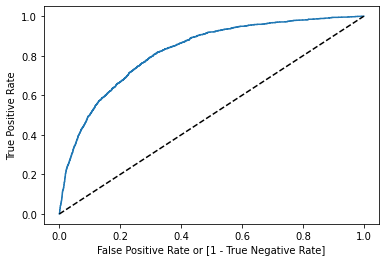

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,grid_reg.predict_proba(x_test)[:,1]) # 1 and 0

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr,  label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [97]:
fpr

array([0.00000000e+00, 8.35701153e-05, 8.35701153e-05, ...,
       9.92311549e-01, 9.92311549e-01, 1.00000000e+00])

In [98]:
thresholds

array([1.99999935e+00, 9.99999348e-01, 9.99980495e-01, ...,
       1.94195223e-03, 1.90783380e-03, 4.58817098e-06])

In [99]:
auc

0.7344228024458954